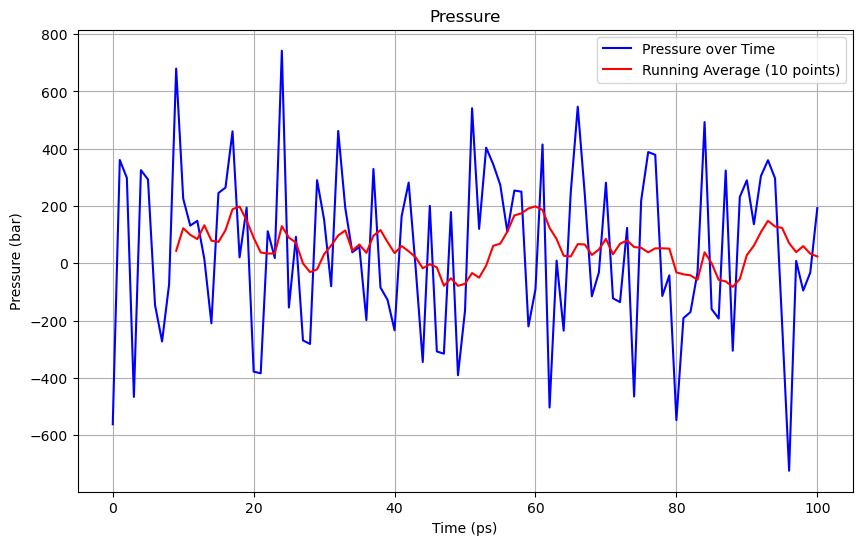

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the newly uploaded data file
file_path_new = "./Trp-cage_NVT_Pressure.xvg"

# Read the file, skipping initial lines starting with "#" or "@" which are comments
with open(file_path_new, 'r') as file:
    lines_new = file.readlines()

# Filter out comments and extract data lines
data_lines_new = [line for line in lines_new if not line.startswith(('#', '@'))]

# Convert the data lines into a pandas DataFrame
data_new = pd.DataFrame([list(map(float, line.split())) for line in data_lines_new], columns=["Time (ps)", "Pressure (bar)"])

# Calculate the running average of the pressure data
window_size = 10  # Define the window size for the running average
data_new['Running Average'] = data_new['Pressure (bar)'].rolling(window=window_size).mean()

# Plotting the data with running average
plt.figure(figsize=(10, 6))
plt.plot(data_new["Time (ps)"], data_new["Pressure (bar)"], label='Pressure over Time', color='b')
plt.plot(data_new["Time (ps)"], data_new['Running Average'], label=f'Running Average ({window_size} points)', color='r')
plt.title('Pressure')
plt.xlabel('Time (ps)')
plt.ylabel('Pressure (bar)')
plt.legend()
plt.grid(True)

# Save and display the plot with running average
plt.savefig('Trp-cage_NVT_Pressure.png')
plt.show()
